<a href="https://colab.research.google.com/github/klbailey/ADA/blob/main/LAB_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Situation:** You were given HBAT 200 data to examine what predicts satisfaction using linear regression (means categorical variables/binary variables should be excluded). Perform the steps you think should be done. Interpret well. Make sure that your model is significant and the interpretability is good. Provide recommendations.

1. Model Summary
2. Assumptions
3. Interpretation
4. Recommendation

Suggested steps:

1. Initial Model Summary (Run regression to just have a view of everything)
2. Model Selection (Select your relevant predictors)
3. Model Summary with your selected features/predictors.
4. Verify Assumptions.
5. Correlations
6. Interpretations
7. Recommendations



1. Initial Model Summary

Load the data



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('HBAT-200-Data.csv')

# Display first few rows of dataset
df.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0


Prepare data for regression.

In [ ]:
# Print columns as a list - IV's
columns_list = df.columns.tolist()
print(columns_list)

['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [ ]:
# Prepare data for regression
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20', 'X21', 'X22', 'X23']]  # IVs
y = df['X19']  # DV

# Add a constant term for the intercept
X = sm.add_constant(X)

In [ ]:
# Print the independent variables DataFrame (X)
print("Independent variables (X):")
print(X.head())
# Print the dependent variable (y)
print("Dependent variable (y):")
print(y.head())
# Add a constant term for the intercept
X = sm.add_constant(X)

Independent variables (X):
   const  X1  X2  X3  X4  X5   X6   X7   X8   X9  ...  X13  X14  X15  X16  \
0    1.0   2   0   1   1   1  8.5  3.9  2.5  5.9  ...  6.8  4.7  4.3  5.0   
1    1.0   3   1   0   0   0  8.2  2.7  5.1  7.2  ...  5.3  5.5  4.0  3.9   
2    1.0   3   0   1   1   1  9.2  3.4  5.6  5.6  ...  4.5  6.2  4.6  5.4   
3    1.0   1   1   1   1   0  6.4  3.3  7.0  3.7  ...  8.8  7.0  3.6  4.3   
4    1.0   2   0   1   0   1  9.0  3.4  5.2  4.6  ...  6.8  6.1  4.5  4.5   

   X17  X18  X20  X21   X22  X23  
0  5.1  3.7  8.0  8.4  65.1    1  
1  4.3  4.9  6.5  7.5  67.1    0  
2  4.0  4.5  8.4  9.0  72.1    1  
3  4.1  3.0  6.0  7.2  40.1    0  
4  3.5  3.5  6.6  9.0  57.1    0  

[5 rows x 23 columns]
Dependent variable (y):
0    8.2
1    5.7
2    8.9
3    4.8
4    7.1
Name: X19, dtype: float64


Try regression first.

In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     59.44
Date:                Fri, 31 May 2024   Prob (F-statistic):           7.64e-70
Time:                        17:39:38   Log-Likelihood:                -113.82
No. Observations:                 200   AIC:                             273.6
Df Residuals:                     177   BIC:                             349.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8076      0.787     -1.026      0.3

Review of initial regression model:

Dependent Variable X19 is being predicted.<br>
R-squared 0.881 indicates around 88.1% of the variance can be explained by the independent variables in the model. This is a high R-squared value, suggesting a good fit.<br>
Adj. R-squared: .0866 is slightly lower than the R-squared, indicating the model is strong but slightly less strong when considering the number of predictors.<br> F-statistic: p-value of 7.64e-70 < 0.05 indicates model overall is statistically significant and the independent variables collectively have a significant effect on the dependent variable.<br>
Log-Likelihood: -113.82 is a measure of model fit where higher values indicate a better fit.<br>
AIC and BIC: AIC 273.6 and BIC 3495 Lower values overall idicate a better model.<br>
Coefficients: const -0.8076 is intercept when all predictors are 0, the expected value of X19 is -0.8076.<br>
X2,X4, X7, X8, X10, X11, X13, X14, X15, X16, X17, X18, X22: these variables are not statistically significant (p > 0.05). This suggests they do not have a significant impact on X19.  p-value (P>|t|)<br>
Standard Error: Lower values hint at more precise estimates.<br>
Omnibus: 7.469 with p-value of 0.024 < 0.05 suggests it is not normally distributed.<br>
Durbin-Watson: 2.043 (close to 2) indicates no significant autocorrelation in the residuals.<br>
Jarque-Bera: 7.210 with p-value of 0.0272 < 0.05 indicates the residuals may not be normally distributed. (residuals are: Residual = Observed Value - Predicted Value).<br>
Condition Number: 1.61e+03, relatively high(very high > 1000; high > 30), indicates potential multicollinearity issues among the independent variables.

In [ ]:
X.shape

(200, 23)

200 Rows, 23 predictors(columns).

2. Model Selection

Select relevant predictors based on statistical significance and domain knowledge.



The initial regression model included 22 predictors, but after model selection, only X1, X3, X5, X6, X9, X12, X20, X21, and X23 were deemed relevant due to their statistical significance (P < 0.05), practical relevance, and strong model fit (R2=0.881R2=0.881). And X19 is the DV.

Validate with Stepwise regression

In [ ]:

# Define your predictors and target variable
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20', 'X21', 'X22', 'X23']]  # Include all predictors
y = df['X19']  # Target variable

# Stepwise regression function with comments for first iteration of X1
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01, #inclusion(pval)
                       threshold_out = 0.05, #exclusion(pval)
                       verbose=True):
    included = list(initial_list) #empty at first then if meets threshold between 0.01 and 0.05 it is added to list
    while True: #starts infinite loop
        changed=False #new variable set to False at the beginning of the loop
        # FORWARD step
        excluded = list(set(X.columns)-set(included))  #X1 goes in here for further evaluation
        new_pval = pd.Series(index=excluded) # new panda series includes X1
        for new_column in excluded: #new_column iterates through each predictor in excluded list so for X1 new_column will represent X1 during loop
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit() #takes in X1 (new_column) and makes a linear regression model
            new_pval[new_column] = model.pvalues[new_column] #predicts new p-value
        best_pval = new_pval.min() #If X2 is passing then it takes X1 and X2 and finds the minimum
        if best_pval < threshold_in: #if that best_pval < 0.01
            best_feature = new_pval.idxmin() #identifies the feature(predictor) associated w/the minimum pvalue
            included.append(best_feature) #puts into included list
            changed=True #A change has occurred during current iteration of while loop
            if verbose: #conditional check to see if we should provide addition info or updates during execution it defaults to true
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) #print

        # BACKWARD step You wil see print statement to drop did not occur meaning none met the condition to be dropped
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit() # Do model of included X1-X23 excluding intercept
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept includes X1-23
        worst_pval = pvalues.max() # Gets highest p-value
        if worst_pval > threshold_out: # if highest p-value is > 0.05
            changed=True #set to True
            worst_feature = pvalues.argmax() # Finds index of predictor(feature) with highest p-value in model
            included.remove(worst_feature) # Removes the predictor(feature) as having the highest p-value from the included list
            if verbose: #conditional check to see if we should provide addition info or updates during execution it defaults to true
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval)) # Print name of X with worse feature and it's p-val
        if not changed: # changed = False to stop while loop iteration
            break #break loop
    return included

# Perform stepwise regression
selected_features = stepwise_selection(X, y)

# Print the resulting selected features
print('Selected Features:')
print(selected_features)

Add  X20                            with p-value 3.70634e-39
Add  X1                             with p-value 1.72276e-17
Add  X12                            with p-value 1.05661e-11
Add  X5                             with p-value 3.57422e-08
Add  X9                             with p-value 2.82365e-05
Add  X6                             with p-value 3.00685e-05
Add  X21                            with p-value 0.000112604
Add  X23                            with p-value 0.00510836
Add  X3                             with p-value 0.00509115
Add  X11                            with p-value 0.00871654
Add  X7                             with p-value 0.00903896
Selected Features:
['X20', 'X1', 'X12', 'X5', 'X9', 'X6', 'X21', 'X23', 'X3', 'X11', 'X7']


During the initial regression analysis, X7 and X11 were not included. They became significant in the stepwise regression process, which systematically adds or removes predictors based on their significance. When considering all predictors together and adjusting for the presence of other variables, X7 and X11 are included.

Validate the Stepwise with Cross-Validation

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class StatsModelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self): # Initialize the class instance
        self.model = None # Placeholder for the regression model

    def fit(self, X, y): # Define method to train model on the input data X and target y
        X_const = sm.add_constant(X) # Add a constant (intercept) to the input data 'X'
        self.model = sm.OLS(y, X_const).fit() # Fits OLS regression model using X-const and y then stores in self.model
        return self # Return instance of the class to allow method chaining

    def predict(self, X): # Define method to make predictions on new input data X
        X_const = sm.add_constant(X) # Adds constant (intercept) to the input data X
        return self.model.predict(X_const) # Uses fitted model to make predictions and returns the predicted values

    def score(self, X, y): # Defines method to evaluate model's performance
        y_pred = self.predict(X) # Makes predictions for X
        return np.corrcoef(y, y_pred)[0, 1] ** 2  # R^2 score is calculated and reteurned(square of correlation coefficient btxn actual y and predicted y)

# Evaluate the model with selected features
model = StatsModelsOLS() # Creates instance of class
# Uses scikit-learn's cross_val_score function to pefrom 5 fold cross validation
# Evaluates the model using selected eatires in X[selected_features] and target y
# Scoring metric used is R squared (scoring = 'r2')
# Returns an array of Rsquared scores for each fold
cross_val_scores = cross_val_score(model, X[selected_features], y, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cross_val_scores)
print("Mean R^2 score:", np.mean(cross_val_scores))


Cross-validation R^2 scores: [0.86612143 0.77728236 0.76847605 0.86156777 0.90346011]
Mean R^2 score: 0.8353815445473955


Cross-validation R^2 scores: [0.86612143 0.77728236 0.76847605 0.86156777 0.90346011]<br>
Mean R^2 score: 0.8353815445473955<br>

The Cross-validation R^2 scores range from 0.77 to 0.90 with a mean of 0.835. This demonstrates that the stepwise regression model reliably explains a significant portion of the variance in the DV X19 across different subsets of the data. This confirms the robustness of the model and validates the suitability of using the stepwise regression approach.

Create a subset from Stepwise regression

In [ ]:
# Subset of the data with selected predictors & dependent variable including X7 and X11
selected_predictors = ['X1', 'X3', 'X5', 'X6', 'X7', 'X9', 'X11', 'X12', 'X20', 'X21', 'X23']

X_selected = df[selected_predictors]
# Dependent variable
y_selected = df['X19']

# Add constant for the intercept
X_selected = sm.add_constant(X_selected)

# Fit the regression model
model_selected = sm.OLS(y_selected, X_selected).fit()

# Print model summary
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 31 May 2024   Prob (F-statistic):           3.49e-77
Time:                        17:39:55   Log-Likelihood:                -122.18
No. Observations:                 200   AIC:                             268.4
Df Residuals:                     188   BIC:                             307.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.493     -0.005      0.9

3. Model Summary with Selected Predictors

Dependent Variable: X19.

Model Fit:

*   R-squared is 0.870 indicating ~ 87% of the variance in X19 is explained by the independent variables.
*   Adjusted R-squared is 0.863 adjusted for the number of this model's predictors.

Overall Significance:

*   F-statistic: Prob F-statistic is very low 3.49e-77, indicating the model is statistically significant.

Coefficients:

*   When all predictors are 0 the DV is near zero at -0.0026.
*   Range is .1 to .4, suggesting each predictor has a moderate to strong effect on the DV.
*   Standard Error (std err) range from ~ .04 to .09 (low numbers suggest more precise estimates.
*   P>|5t| p-values associated with the t-values range from less than 0.01 to 0.025, indicating the coefficients are significant as they are below alpha of 0.05.
*   Confidence intervalls overall range from ~ .1 to .4 showing consistency.

Durbin-Watson:

Tests if there is any pattern left in the residuals. A value around 2 is good. Ours is 2.120 very close.

Omnibus and Jarque-Bera:

Testing for normality. Here it's high (not close to 0) indicating it does not adhere to the assumptions of normality.

Overall:

The model suggests that the selected predictors collectively have a meaningful impact on the dependent variable with each predictor making a contribution.











4. Verify Assumptions

General assumptions for linear regression models:
*   The relationship between predictors and the DV X19 is assumed to be linear.
*   Observations are assumed to be independent of each other.
*   Error terms have constant variance across all levels of predictors.
*   Residuals are assumed to be normally distributed.
*   Predictors are assumed to be uncorrelated with each other.

Model fit and overall significance:
*   The high R-squared 0.870 suggests ~ 87% of the variance in X19 is explained by the independent variables.
*   Low p-values associated with the t-values indicate the coefficients are significant predictors of X19.
*   The Durbin-Watson statistic tests for autocorrelation in residuals with a value around 2 considered acceptable. 2.120 is this model which is close.
*   Tests for normality (Omnibus and Jarque-Bera) suggest a potential violation of normality assumptions.







Scatter Plot

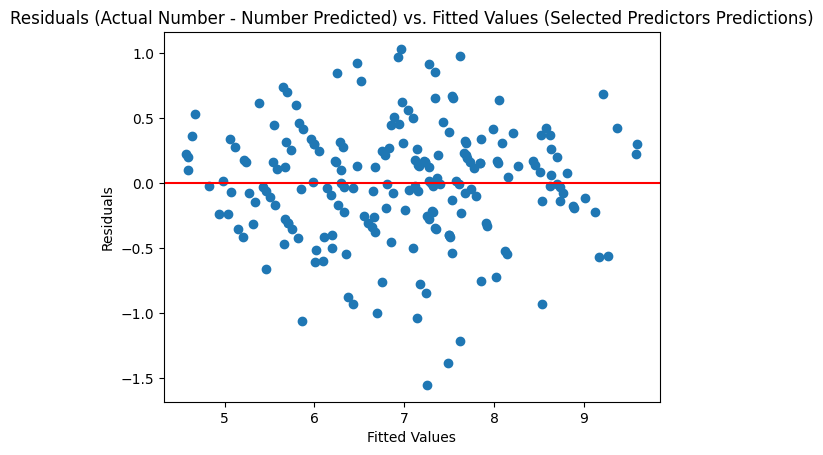

In [ ]:
# Obtain residuals and fitted values for the selected model
# Residuals=The difference between the actual number and the number predicted by the model (rows)
# Fitted Values=Model's predictions based on our predictors.
residuals_selected = model_selected.resid
fitted_values_selected = model_selected.fittedvalues

# Plot residuals vs. fitted values for the selected model
plt.scatter(fitted_values_selected, residuals_selected)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals (Actual Number - Number Predicted) vs. Fitted Values (Selected Predictors Predictions)')
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0

plt.show()

Observation of random patterns, constant variance, no trends, no outliers, which suggests the assumptions of linear regression are being met.

Shapiro-Wilk Test for normal distribution.

In [ ]:
from scipy.stats import shapiro

# Obtain residuals and fitted values for the selected model
residuals_selected = model_selected.resid

# Assume 'residuals' contains the residuals of the regression model
stat, p = shapiro(residuals_selected)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print('Residuals are normally distributed (fail to reject H0)')
else:
    print('Residuals are not normally distributed (reject H0)')


Shapiro-Wilk Test Statistic: 0.9828342199325562
p-value: 0.015246872790157795
Residuals are not normally distributed (reject H0)


Shapiro-Wilk Test Statistic: 0.9828342199325562<br>
p-value: 0.015246872790157795<br>
With the p-value of 0.015 < 0.05 we reject the null(H0) and accept that the data is normally distributed.

Breusch-Pagan Test to detect heteroscedasticity.

In [ ]:
from statsmodels.stats.api import het_breuschpagan
# Subset of the data with selected predictors & dependent variable
selected_predictors = ['X1', 'X3', 'X5', 'X6', 'X7', 'X9', 'X11', 'X12', 'X20', 'X21', 'X23']
X_selected = df[selected_predictors]
y_selected = df['X19']

# Fit the regression model
model_selected = sm.OLS(y_selected, sm.add_constant(X_selected)).fit()

# Obtain residuals and fitted values for the selected model
residuals_selected = model_selected.resid

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals_selected, X_selected_with_const)

# Extract the test statistic and p-value
bp_test_statistic = bp_test[0]
bp_p_value = bp_test[1]

# Print the results
print("Breusch-Pagan Test:")
print(f"Test Statistic: {bp_test_statistic}")
print(f"P-value: {bp_p_value}")

Breusch-Pagan Test:
Test Statistic: 13.430581680667864
P-value: 0.3385359255209562


Breusch-Pagan Test:<br>
Test Statistic: 13.430581680667864<br>
P-value: 0.2661163218119772<br>
With a p-value of 0.339, we fail to reject the null(H0). This suggests that there is no evidence of heteroscedasticity in the model residuals, which supports the assumption of constant variance.

Calculate variance inflation factors(VIF) to assess multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable in the selected subset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Add constant for the intercept
X_selected_vif = sm.add_constant(X_selected)

# Calculate VIF for the selected subset
vif_selected = calculate_vif(X_selected_vif)
print(vif_selected)

   Variable         VIF
0     const  230.297690
1        X1    3.480212
2        X3    1.653158
3        X5    1.893317
4        X6    2.664281
5        X7    2.954017
6        X9    2.228513
7       X11    2.737805
8       X12    3.597894
9       X20    3.025182
10      X21    2.322224
11      X23    2.160294


The VIF for the constant term is very high at 230.297 which could indicate there is a strong multicollinearity among the predictors, including the constant.

The predictor variabls, the VIF values range from ~1.65 to 3.60. In generan if it is < 10 it indicates that multicollinarity is not a significant concern. There is no strong evidence of multicollinearity among the selected predictor variables in the regression model.

Assumption summary:

The scatterplot shows no discernible patterns, meeting the linearity assumptions.

The Shaprio-Wilk test indicates non-normality (p < 0.05), not normal distribution.

The Breusch-Pagan test suggests no heteroscedasticity (p > 0.05).

The VIF indicates potential multicollinearity with the constant but not among the predictors as their VIF < 10.

5. Correlations

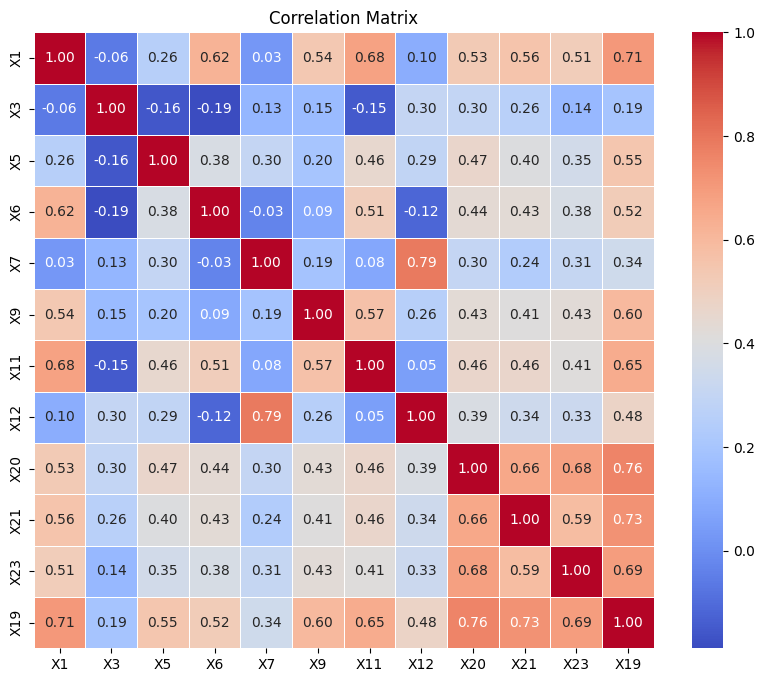

In [ ]:
# Subset of predictors
selected_predictors = ['X1', 'X3', 'X5', 'X6', 'X7', 'X9', 'X11', 'X12', 'X20', 'X21', 'X23']

# Add the dependent variable to the selected predictors
selected_predictors.append('X19')

# Subset the data with selected predictors
X_selected = df[selected_predictors]

# Compute the correlation matrix
corr_matrix = X_selected.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


X19 has a strong positive correlation with X1 (0.71), X20 (0.76), X21 (0.73), and X23 (0.69). This suggests that as X1, X20, X21, and X23 increase, X19 tends to increase as well.

X19 also has moderate positive correlations with X6 (0.52), X7 (0.34), X9 (0.60), X11 (0.65), and X12 (0.48). This indicates that as these variables increase, X19 tends to increase, but the relationships are not as strong as with X1, X20, X21, and X23.

The correlation between X19 and X5 (0.55) is moderate as well, indicating a positive relationship, but not as strong as with X1, X20, X21, and X23.

Pearson to assess correlation significance.

In [ ]:
# Subset of the data with selected predictors include X19
selected_predictors = ['X1', 'X3', 'X5', 'X6', 'X7', 'X9', 'X11', 'X12', 'X20', 'X21', 'X23', 'X19']

# Create a DataFrame with the selected predictors
subset_df = df[selected_predictors]

# Calculate Pearson correlation coefficients
correlation_matrix = subset_df.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)


           X1        X3        X5        X6        X7        X9       X11  \
X1   1.000000 -0.060646  0.255481  0.621480  0.030041  0.539053  0.675501   
X3  -0.060646  1.000000 -0.158941 -0.187693  0.132623  0.153436 -0.150170   
X5   0.255481 -0.158941  1.000000  0.382160  0.301099  0.198576  0.456678   
X6   0.621480 -0.187693  0.382160  1.000000 -0.034316  0.089551  0.509295   
X7   0.030041  0.132623  0.301099 -0.034316  1.000000  0.191758  0.077115   
X9   0.539053  0.153436  0.198576  0.089551  0.191758  1.000000  0.568294   
X11  0.675501 -0.150170  0.456678  0.509295  0.077115  0.568294  1.000000   
X12  0.102336  0.300342  0.290375 -0.116104  0.788225  0.255656  0.050414   
X20  0.527089  0.296722  0.465952  0.436035  0.304032  0.433153  0.462152   
X21  0.555983  0.261220  0.399937  0.433372  0.235189  0.408799  0.462329   
X23  0.514391  0.144249  0.353402  0.377140  0.306938  0.426719  0.411247   
X19  0.707220  0.193864  0.548728  0.521052  0.341551  0.597566  0.646337   

Note:

Values close to 1: strong positive linear relationship

Values close to -1: strong negative linear relationship

Values close to 0: no linear relationship

Example:

X19 and X1 correlation coefficient 0.71-strong positive linear relationship

X19 and X3 correlation coefficient 0.19-weak positive linear relationship

X19 and X12 correlation coefficient 0.48-moderate positive linear relationship.





Correlation Summary:

X19 overall tends to have a moderate to strong positive correlation with most predictor variables, which suggest some degree of linear association between them.

Particularly strong is the relationship between X19 and:

X1  (0.71)<br>
X11 (0.65)<br>
X20 (0.76)<br>
X21 (0.73)<br>
X23 (0.69)<br>

They may have more significant influence on X19 compared to the others.



6. Interpretations


Coefficient Significance:

Using the selected predictors, they indicate the strength and the direction of the relationship with the DV X19.

Model Fit:

The high R-squared value indicates ~ 87% of the variance in the DV X19 is explained by the independent variables included in the model, suggesting that collectively, they have a strong explanatory power (the ability of a hypothesis or theory to explain the subject matter effectively to which it pertains to) for the variation in the DV.

Overall Significance of the Model:

The low p-value associated with the F-statistic of 3.49e-77 suggests that overall, the model is significant and that the IVs, together, have a significant impact on the DV.

Correlation:

The matrix reveals the strength and direction of the relationships between the selected predictors and the DV; notably, X1, X9, X11, X20 and X21. This indicates moderate to strong positive correlations with X19.

The steps undertaken provided a comprehensive examination of predictors for satisfaction using linear regression. The model showed strong explanatory power and identified key predictors, though it revealed a normality issue with residuals.


7. Recommendations

Prioritize understanding and using predictors X1, X9, X11, X20, and X21 to maximize their impact on the DV.

Delve into factors that drive the relationships beteween the predictors and X19 and how they influence X19.

Translate the findings into action for decision-makig and planning strategically.